Importing libraries and data

In [1]:
from sklearn.datasets import load_diabetes
diab = load_diabetes()
print(diab)
print(diab.DESCR)
from sklearn.model_selection import train_test_split

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [6]:
#print(diab.data.shape)

(442, 10)


In [4]:
#print(diab.target.size)

442


In [3]:
#print(diab.data)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [15]:
from sklearn.linear_model import Lasso
x_train, x_test, y_train, y_test = train_test_split(diab['data'], diab['target'], random_state = 2212)
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(x_train, y_train)
print(lasso_reg.coef_)
pred = lasso_reg.predict(x_test)
#print(pred)
#print(y_test)

[  -0.         -152.23582501  597.3997159   209.2340184  -138.64270077
   -0.         -176.5883705     0.          550.4975621    66.84364085]
[112.64185933 189.40884709 118.70132142 148.59369969 184.92071316
 131.94523337 158.19532517 226.47640394 152.83283597 209.2518883
 256.99105868 227.64886896 130.96813413 139.40311506  63.94815008
 188.31190711 109.74125544 104.69688737 154.49565833 108.74577713
 124.85840386 120.01862948 180.38914908 153.95026911  67.81000392
  51.8738669   98.1857839   71.50186508  74.03939519 158.74846332
  96.6989413  105.73774138 219.4491695  112.6191607  118.19132318
 200.63207801 246.41734592 113.42646877  80.87143214 233.13167517
 146.80053867  75.16982611  78.39859455 260.97063349 108.529286
 148.23707146 239.17899893 153.45412421 206.1058073  265.85276074
 141.36382138 205.68026918 180.65059195 148.19091514 136.08319581
 179.71427108 156.81188771 164.29229792 236.16045809  85.7285607
  60.60246094 141.86092971 176.20838692 208.68891829  91.10516476
  6

in the above are the coeffiecents and the of the model, the prediction and the actual results.
As you can see it has made age, s2 and s4 converge to zero. In the next cell i will get the R^2 value of test and training data.

In [23]:
from sklearn.metrics import r2_score
#for test set
r2 = r2_score(pred, y_test)
print("test set: "+str(r2))
train_pred = lasso_reg.predict(x_train)
r3 = r2_score(train_pred, y_train)
print("training set: "+str(r3))

test set: -0.17204251740656495
training set: 0.08173505375592416


What is the training and test R2 for the Lasso model using the default parameters?
as you can see from above test set = -0.17204251740656495
this isnt a good score so it doesnt fit too well
the training set gives a slightly better score of 0.08173505375592416
this means it fits better however it is not close to 1 so cant be considered reliable either.

How many features does this model use?
the model only uses 7 of the original 10, it uses
sex, bmi, bp, s1, s3, s5 and s6, the others age, s2 and s4 turn to zero for their coeffiecents. 

What are the names of those features?
answered above.

In [128]:
import numpy as np
diab2 = np.genfromtxt("diabetes.data", delimiter="")
#print(diab2)
diab2 = np.delete(diab2, 0, 0)
print(diab2.shape)

(442, 11)


In [129]:
labels = np.delete(diab2, [0,1,2,3,4,5,6,7,8,9],1)
#print(labels)
data = np.delete(diab2, [10], 1)
#print(data.shape)

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
z_train, z_test, v_train, v_test = train_test_split(data, labels, random_state = 2212)
lasso_test = Lasso(alpha = 0.1)
lasso_test.fit(z_train, v_train)
print(lasso_test.coef_)
pred = lasso_test.predict(z_test)

[ -0.09479698 -21.74628005   6.50782774   0.89383132  -1.05128514
   0.56270638   0.45441997   8.1001466   69.18308612   0.44030795]


In [131]:
from sklearn.metrics import r2_score
r2 = r2_score(pred, v_test)
print("test score: "+str(r2))

test score: -0.08778417290065166


In [132]:
pred2 = lasso_test.predict(z_train)
r3 = r2_score(pred2, v_train)
print("train score: "+str(r3))

train score: 0.21775254604727223


as you can see the training score increases from around 0.08 to around 0.22, this is a dramatic increase. this is also true for the test score increasing from -0.17 to -0.08, again a noticeable increase. In this case also features are active, no coeffiencents have turned to zero, meaning they all have an affect. the most interesting thing I spotted was how coeffeicent[7] and [6] essentially swap relevance. 6 practically goes to zero whereas 7 increases a lot from zero. 

In [135]:
from sklearn.preprocessing import StandardScaler
z, z_t, v, v_t = train_test_split(data, labels, random_state = 2212)

scalerData = StandardScaler(with_mean=0, with_std=1).fit(z)
#print(z)
z = scalerData.transform(z)
z_t = scalerData.transform(z_t)
#print(z)
v = scalerData.fit_transform(v)
v_t = scalerData.transform(v_t)

In [136]:
from sklearn.metrics import r2_score
new_lasso = Lasso(alpha=0.1)
new_lasso.fit(z, v)
print(new_lasso.coef_)
pred = new_lasso.predict(z_t)
r2 = r2_score(pred, v_t)

train = new_lasso.predict(z)

r3 = r2_score(train, v)
print("test score: "+str(r2))
print("training score: "+str(r3))

[ 0.         -0.          0.35002204  0.07261507 -0.         -0.
 -0.05929727  0.          0.28606072  0.        ]
test score: -0.6184376996648411
training score: -0.3965266007052828


the results of this scaled set are odd. I didnt believe them at first which is why I scaled the data twice. however this did not work either. I thought before standardising that the scores would be closer to the set from sklearn however theyre actually worse than either. 6 coeffiecents have gone to zero and they dont match any of the other coeffiecents. the scores have also worsened. the training score is negative, indicating it's not working. however, the only way to make the scores better would be to make the alpha value smaller. so I've decided to use my own method for R^2

In [86]:
#RSS and TSS for training data
rss_sum = 0
tss_sum = 0
mean = np.mean(v)
for i in range(len(train)):
    rss_sum =+ (v[i]-train[i])**2
    tss_sum =+ (v[i]-mean)**2
rsquared = 1 - (rss_sum/tss_sum)
print(rsquared)
#clearly shows a worse score, will now try on test

[7.0780585]


In [90]:
rss = 0
tss = 0
mean = np.mean(v_t)
for i in range(len(pred)):
    rss =+ (v_t[i]-pred[i])**2
    tss =+ (v_t[i]-mean)**2
rsquared = 1 - (rss/tss)
print(rsquared)

[-36.39963557]


ive ended with worse scores than when i started to clearly this hasnt worked.
what I've noticed is that the scores are almost the same when the mean is applied to the predicted set.

to answer q8
Are your current results closer to those in item 3 or item 6? 
the results using the sklearn method are closer to item 6, the results using the code in cells 86 and 90 are not close to either.
Notice that a priori you would expect your current results to be closer to those in item 3, since the reason for different results in items 3 and 6 was that the former were for normalized data while the latter were for the original data. Is this expectation confirmed?
If not, why?
I think the standardScaler doesnt work for sklearn very well, I was expecting the results to be close to 3 not further from both. 

Varying the parameter α in the Lasso, plot the test R2 vs the number of features used (i.e., those with non-zero coefficients). Try to make your plot as pretty as possible. (Obviously, it’s subjective.) Which point on the curve do you prefer? (There is no unique correct answer to this question.) Give a brief explanation of your preference.

In [126]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_diabetes
diab = load_diabetes()
x_train, x_test, y_train, y_test = train_test_split(diab['data'], diab['target'], random_state = 2212)
lasso_reg = Lasso(alpha = 0.25)
lasso_reg.fit(x_train, y_train)
print(lasso_reg.coef_)
pred = lasso_reg.predict(x_test)

[  -0.          -28.54132799  578.9742935   151.21782363   -0.
   -6.74856901 -135.62911641    0.          475.15053117    1.87091883]


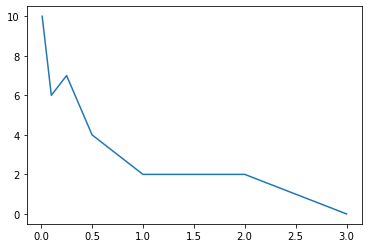

In [125]:
import matplotlib.pyplot as plt
alpha = [3, 2, 1, 0.75,0.5, 0.25, 0.1, 0.01]
num_of_features = [0, 2, 2, 3, 4, 7, 6,10]
plt.plot(alpha, num_of_features)
plt.show()

(Obviously, it’s subjective.) Which point on the curve do you prefer? (There is no unique correct answer to this question.) Give a brief explanation of your preference.
I prefer 0.25, it incorporates the most features before it goes up exponentially to ten. 
However I think 0.1 is also the most practical as it appears as a dip so it could be that it is the most optimal in the graph. Obviously numbers from 3 and 0.01 are not useful as they either use all of the features or none. the numbers from 3-0.5 frankly dont use enough features to be accurate. anything below 0.25 will use too many features. this makes it hugely inaccurate, as unuseful features are used. 

Choose the regularization parameter for the Lasso using cross-validation on the training set. Train the Lasso on the whole training set using the chosen values of the parameters. Report the resulting training and test R2 and the number of features used. (As before, you are allowed to use any scikit-learn functions.)
I've used the sklearn version as im not sure I normalised the raw version properly

In [181]:
from sklearn.svm import SVC
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=2212)
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
lasso = Lasso()
score_best =0
alpha_best = 0
for C in [0.001,0.001,0.01,0.1,0.25,0.5,0.75,1,2,3]:
    svm = SVC(C=10**C, kernel='linear')
    score = cross_val_score(svm, x_train, y_train, cv=5)
    print(score)
    score = np.mean(score)
    if score > score_best:
        print(score)
        score_best = score
        alpha_best = C

svm = SVC(C = alpha_best)
svm.fit(X_test, y_test)
print(svm.score(X_test, y_test))
lasso_reg = Lasso(alpha = alpha_best)
lasso_reg.fit(x_train, y_train)
pred = lasso_reg.predict(x_test)
train = lasso_reg.predict(x_train)
r2 = r2_score(train, y_train)
r3 = r2_score(pred, y_test)
print(alpha_best)
print(r2)
print(r3)
print(lasso_reg.coef_)


/Users/callanduffy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[0.02985075 0.03030303 0.01515152 0.01515152 0.03030303]
0.024151967435549527


/Users/callanduffy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[0.02985075 0.03030303 0.01515152 0.01515152 0.03030303]


/Users/callanduffy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[0.02985075 0.03030303 0.01515152 0.01515152 0.03030303]


/Users/callanduffy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[0.02985075 0.03030303 0.01515152 0.01515152 0.03030303]


/Users/callanduffy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[0.02985075 0.03030303 0.01515152 0.01515152 0.03030303]


/Users/callanduffy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[0.02985075 0.03030303 0.01515152 0.01515152 0.03030303]


/Users/callanduffy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[0.02985075 0.03030303 0.01515152 0.01515152 0.03030303]


/Users/callanduffy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[0.02985075 0.03030303 0.01515152 0.01515152 0.03030303]


/Users/callanduffy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[0.01492537 0.01515152 0.01515152 0.         0.01515152]


/Users/callanduffy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[0.         0.         0.         0.         0.01515152]
0.2882882882882883
0.001
0.2214890779007238
-0.0850443985067606
[ -25.5210853  -232.57053902  602.27988228  259.36316221 -802.394194
  386.6414082   141.93601592  228.26504651  777.54471289  104.66252849]


the cross_val_score approach only gives me the first c value cross_val_score doesnt change when c changes, 

Split the training set that you obtained in item 5 into two parts: the calibration set of size 99 and the rest of the training set (the training set proper). Use your birthday (in the format DDMM) as random_state.

In [207]:
import numpy as np
diab2 = np.genfromtxt("diabetes.data", delimiter="")
diab2 = np.delete(diab2, 0, 0)
labels = np.delete(diab2, [0,1,2,3,4,5,6,7,8,9],1)
data = np.delete(diab2, [10], 1)
X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state=2212)
x_train = X_train[:232]
x_train_proper = X_train[232:331]
Y_train = y_train[:232]
y_train_proper = y_train[232:331]
print(y_train_proper.shape)

(99, 1)


In [212]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train_proper = scaler.transform(x_train_proper)
x_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train)
y_train_proper = scaler.transform(y_train_proper)
y_test = scaler.transform(y_test)

In [ ]:
nonConformScores = []
